In [1]:
!pip3 install torch torchvision h5py

  Using cached https://files.pythonhosted.org/packages/80/2a/58f8078744e0408619c63148f7a2e8e48cf007e4146b74d4bb67c56d161b/torch-1.7.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e7/43/aaa740c406b1832adc6ff9d5e71c23fd2af2ebd436c42d76d85809ec8be9/torchvision-0.8.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/70/7a/e53e500335afb6b1aade11227cdf107fca54106a1dca5c9d13242a043f3b/h5py-3.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a6/fc/36e52d0ae2aa502b211f1bcd2fdeec72d343d58224eabcdddc1bcb052db1/numpy-1.19.4-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/60/7a/e881b5abb54db0e6e671ab088d079c57ce54e8a01a3ca443f561ccadb37e/typing_extensions-3.7.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/ca/75fac5856ab5cfa51bbbcefa250182e50441074fdc3f803f6e76451fab43/dataclasses-0.8-py3-none-any.whl
  Usin

Uncomment the below cell if you didn't already run the other notebook and wget the dataset previously - else, you can just move it into the directory here to use instead.
You will need to download the weights they have trained here: https://oregonstate.app.box.com/s/p3lbkgiwufg9rxfgx53c4svnzz2lz9av and place them into this directory as well, under the name all-scales-trained.ckpt.

In [2]:
#!wget http://horatio.cs.nyu.edu/mit/silberman/nyu_depth_data_labeled.mat

In [3]:
import torch
from torchvision import transforms
from dataset import NYUDataset
from custom_transforms import *
import plot_utils
import model_utils
from nn_model import Net
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

%matplotlib inline
import torch.nn.functional as F

/home/tphan/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
bs = 8
sz = (320,240)
mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
mean, std = torch.tensor(mean), torch.tensor(std)
unnormalize = UnNormalizeImgBatch(mean, std)

tfms = transforms.Compose([
    ResizeImgAndDepth(sz),
    RandomHorizontalFlip(),
    ImgAndDepthToTensor(),
    NormalizeImg(mean, std)
])

In [5]:
ds = NYUDataset('', tfms)
dl = torch.utils.data.DataLoader(ds, bs)

In [6]:
ds[0][0].shape

torch.Size([3, 240, 320])

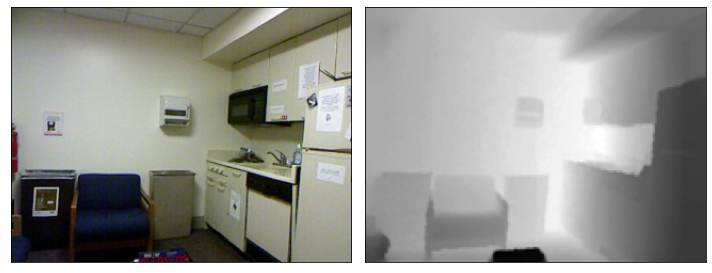

In [7]:
i = 1
plot_utils.plot_image(model_utils.get_unnormalized_ds_item(unnormalize, ds[i]))

#sample_batch = iter(dl).next()
#img, depth = sample_batch

In [8]:
model = Net()
model.to(device)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/tphan/.cache/torch/hub/checkpoints/vgg16-397923af.pth
4.4%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

10.9%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

16.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_r

Net(
  (VGG): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, cei

In [10]:
model.load_state_dict(torch.load('all-scales-trained.ckpt', map_location="cpu"))

<All keys matched successfully>

In [11]:
torch.save(model.state_dict(),'all-scales-trained.ckpt')

In [12]:
%%time
with torch.no_grad():
    model.eval()
    img, depth = iter(dl).next()
    preds = model(img.to(device))

CPU times: user 23.7 s, sys: 425 ms, total: 24.1 s
Wall time: 4.51 s


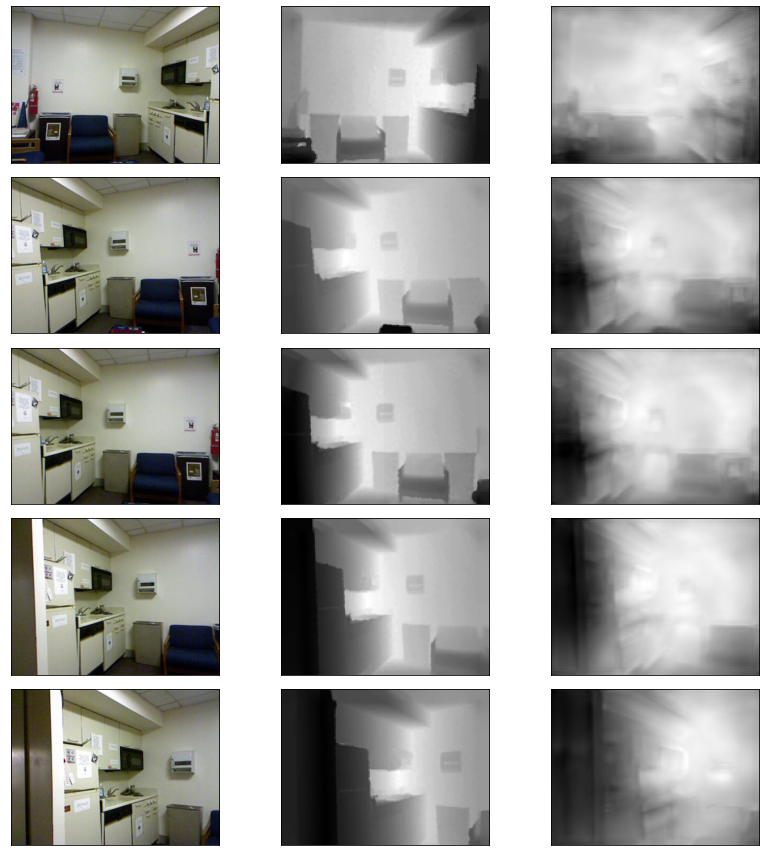

In [13]:
plot_utils.plot_model_predictions_on_sample_batch(images=unnormalize(img), depths=depth, preds=preds.squeeze(dim=1), plot_from=0)

In [16]:
# No random horizontal flip - the original code would include this in the transforms, but we don't need it
# for our use case as we are not training.
consistent_tfms = tfms = transforms.Compose([
    ResizeImgAndDepth(sz),
    ImgAndDepthToTensor(),
    NormalizeImg(mean, std)
])
ds = NYUDataset('', consistent_tfms)
dl = torch.utils.data.DataLoader(ds, 20)

In [17]:
import matplotlib.pyplot as plt

#subplot utils    
def hide_subplot_axes(ax):
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

def plot_image_tensor_in_subplot(ax, img_tensor):
    im = img_tensor.cpu().numpy().transpose((1,2,0))
    #pil_im = Image.fromarray(im, 'RGB')
    ax.imshow(im)

def plot_depth_tensor_in_subplot(ax, depth_tensor):
    im = depth_tensor.cpu().numpy()
    #im = im*255
    #im = im.astype(np.uint8)
    #pil_im = Image.fromarray(im, 'L')
    ax.imshow(im,'gray')

def plot_model_predictions_on_sample_batch(images, depths, preds, plot_from=0, figsize=(12,12)):
    n_items=20
    fig, axes = plt.subplots(n_items, 3, figsize=figsize)
    
    for i in range(n_items):
        plot_image_tensor_in_subplot(axes[i,0], images[plot_from+i])
        plot_depth_tensor_in_subplot(axes[i,1], depths[plot_from+i])
        plot_depth_tensor_in_subplot(axes[i,2], preds[plot_from+i])
        hide_subplot_axes(axes[i,0])
        hide_subplot_axes(axes[i,1])
        hide_subplot_axes(axes[i,2])
    
    plt.tight_layout()

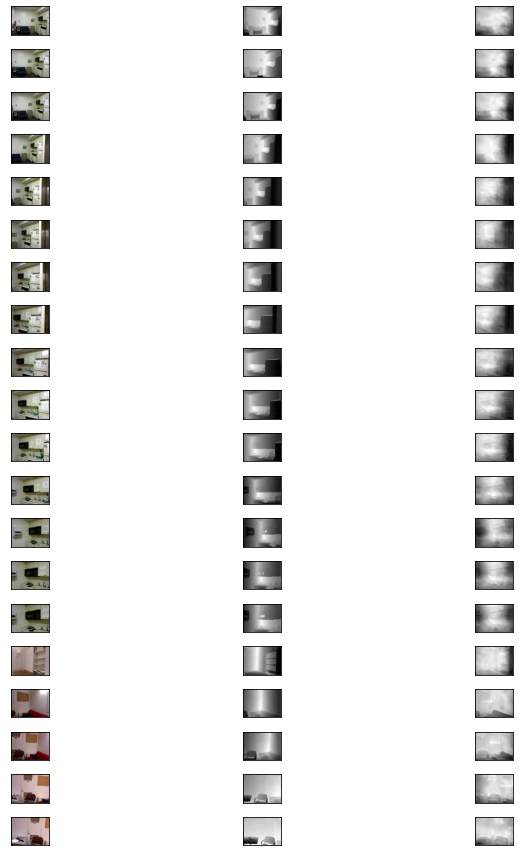

In [18]:
predictions, batch, actual_labels = model_utils.get_model_predictions_on_a_sample_batch(model, dl)
plot_model_predictions_on_sample_batch(images=unnormalize(batch), depths=actual_labels, preds=predictions.squeeze(dim=1), plot_from=0)

In [19]:
def get_model_predictions_on_a_sample_batch(m, dl_iter):
    m.eval()
    with torch.no_grad():
        batch, actual_labels = dl_iter.next()
        batch = batch.to(device)
        actual_labels = actual_labels.to(device)
        predictions = m(batch)
    
    return (predictions, batch, actual_labels)


In [20]:
dl_iter = iter(dl)

In [21]:
import numpy as np

def min_max_of_tensor(ts):
    npa = ts.cpu().numpy()
    print(np.min(npa), np.max(npa))
    
def normalize_tensor_to_np_array(ts):
    npa = ts.cpu().numpy()
    npa = (255*(npa - np.min(npa))/np.ptp(npa)).astype(int)   
    print(np.min(npa), np.max(npa))
    return npa

# We have prediction, which is 20 predictions of n x m images.
# targets is the same dimensions.
# To get the root mean squared error, we have to find 
def mean_squared_error(predictions, targets):
    return ((predictions - targets) ** 2).mean()

#https://stackoverflow.com/questions/17197492/is-there-a-library-function-for-root-mean-square-error-rmse-in-python
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# batch size is 20, so we are testing on the first 200 elements.
mean_squared_errors = []
images_tested = 0
for i in range(10):
    predictions, batch, actual_labels = get_model_predictions_on_a_sample_batch(model, dl_iter)
    # Predictions of depth - not normalized to 0-255 or mindepth-maxdepth scale yet
    predictions_normalized = normalize_tensor_to_np_array(predictions)
    # The images from the batch after our transformations.
    # normalize_tensor_to_np_array(batch)
    # The original, raw depth values.
    actuals_normalized = normalize_tensor_to_np_array(actual_labels)
    mean_squared_errors.append(mean_squared_error(predictions_normalized, actuals_normalized))
    print(mean_squared_errors)
import math
print(math.sqrt(sum(mean_squared_errors) / len(mean_squared_errors)))

0 255
0 255
[3934.1799479166666]
0 255
0 255
[3934.1799479166666, 3319.9290372395835]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083, 9612.831770052084]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083, 9612.831770052084, 6565.194800520833]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083, 9612.831770052084, 6565.194800520833, 5722.86504453125]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083, 9612.831770052084, 6565.194800520833, 5722.86504453125, 4673.965174739584]
0 255
0 255
[3934.1799479166666, 3319.9290372395835, 8659.463451041667, 7668.919920052083, 9612.831770052084, 6565.194800520833, 5722.86504453125, 4673.965174739584, 4604.1504078125]
0 255
0 255
[393